In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from itertools import cycle, islice
linkage = ['ward', 'complete', 'average', 'single']

data = pd.read_csv('bank-full.csv', sep = ';', )
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


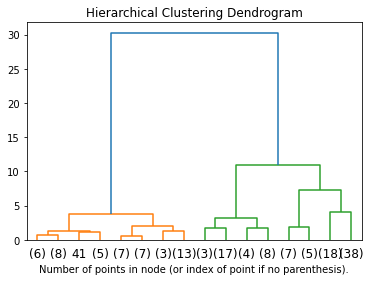

In [65]:
le = LabelEncoder()
dataMatrix = data[:, 0:3]

for i in dataMatrix:
    dataMatrix[i] = le.fit_transform(dataMatrix[i])
    
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_full_tree=True, compute_distances=True)

model = model.fit(dataMatrix)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

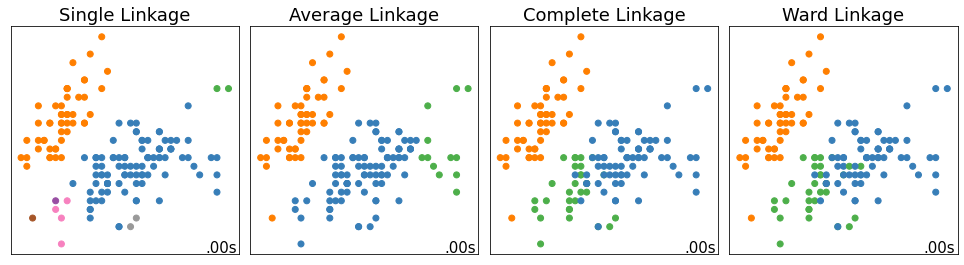

In [71]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 3.3))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

ward = AgglomerativeClustering(linkage="ward", compute_full_tree=True, n_clusters=None , distance_threshold=10)
complete = AgglomerativeClustering(linkage="complete", compute_full_tree=True, n_clusters=None , distance_threshold=4)
average = AgglomerativeClustering(linkage="average", compute_full_tree=True, n_clusters=None , distance_threshold=2)
single = AgglomerativeClustering(linkage="single", compute_full_tree=True, n_clusters=None , distance_threshold=0.5)

clustering_algorithms = (
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward),
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    
    algorithm.fit(dataMatrix)
    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
    plt.subplot(1, len(clustering_algorithms), plot_num)

    plt.title(name, size=18)
    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    plt.scatter(dataMatrix[:, 0], dataMatrix[:, 1], color=colors[y_pred])
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1
plt.show()

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
dataMatrix